1. Sentiment Analysis

Use the newsapi to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:

1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [106]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [107]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [108]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
#print(api_key)

In [109]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="Bitcoin", language="en")
bitcoin

{'status': 'ok',
 'totalResults': 9334,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'Tesla’s $1.5 billion bitcoin purchase clashes with its environmental aspirations',
   'description': 'Tesla announced this week that it purchased $1.5 billion in bitcoin and plans to accept bitcoin as payment in the future. CEO Elon Musk might have boosted bitcoin’s credibility. But greenhouse gas emissions from bitcoin are on the rise as the price of the cry…',
   'url': 'https://www.theverge.com/2021/2/9/22275243/teslas-bitcoin-purchase-clashes-climate-change-mission',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/eQST6cDSwG_MASzsxTUv3igFdxU=/0x430:6000x3571/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22293241/1231048263.jpg',
   'publishedAt': '2021-02-09T23:10:46Z',
   'content': 'Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a paym

In [110]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q="Ethereum", language="en")
ethereum

{'status': 'ok',
 'totalResults': 1927,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
   'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
   'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
   'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
   'publishedAt': '2021-02-18T16:16:57Z',
   'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple 

In [111]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-09,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929
1,2021-02-09,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962
2,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944
3,2021-02-12,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.032,0.916
4,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887


In [112]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856


In [113]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.277078,0.071722,0.008444,0.864222
std,0.296543,0.066116,0.021569,0.224724
min,-0.128000,0.000000,0.000000,0.000000
25%,0.000000,0.010500,0.000000,0.863250
50%,0.213950,0.061000,0.000000,0.914000
75%,0.480525,0.110000,0.000000,0.957250
max,0.831600,0.246000,0.082000,1.000000


In [114]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.241670,0.077250,0.019200,0.903550
std,0.373126,0.063692,0.043104,0.071017
min,-0.458800,0.000000,0.000000,0.754000
25%,0.000000,0.022500,0.000000,0.861750
50%,0.307100,0.074500,0.000000,0.909000
75%,0.513400,0.116500,0.000000,0.946750
max,0.831600,0.246000,0.145000,1.000000


Questions:¶
Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A:Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

2. Natural Language Processing¶

Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:

1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [115]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from string import punctuation
import re
import nltk

In [116]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stop = set()
stop.add("u")
stop.add("it'")
stop.add("'s")
stop.add("n't")

stopwords = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
new_stopwords = stopwords.union(stop)

In [117]:
#set(stopwords.words('english'))
#new_stopwords

In [118]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    
    return tokens

In [119]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-09,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929,"[Tesla, led, by, Elon, Musk, confirmed, that, ..."
1,2021-02-09,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962,"[For, a, brief, moment, on, Sunday, before, Te..."
2,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944,"[Twitter, and, Square, CEO, Jack, Dorsey, and,..."
3,2021-02-12,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.032,0.916,"[When, Bitcoin, first, appeared, out, of, digi..."
4,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[Some, thing, are, best, left, a, mystery, at,..."


In [120]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[Worried, that, the, GeForce, RTX, 3060, will,..."
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[NFTs, are, the, latest, cryptocurrency, rage,..."
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,"[NFTs, non-fungible, token, —, or, scarce, dig..."
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[While, the, first, Christie, auction, of, dig..."
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856,"[Attempting, to, get, ahead, of, cryptocurrenc..."


NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin.

1. Use NLTK to produce the n-grams for N = 2.
2. List the top 10 words for each coin.

In [121]:
from collections import Counter
from nltk import ngrams

In [122]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(grams).most_common(10)

[(('that', 'it'), 3),
 (('in', 'bitcoin'), 3),
 (('Elon', 'Musk'), 2),
 (('1.5', 'billion'), 2),
 (('billion', 'in'), 2),
 (('a', 'a'), 2),
 (('in', 'the'), 2),
 (('the', 'future'), 2),
 (('on', 'Sunday'), 2),
 (('it', 'had'), 2)]

In [123]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(grams).most_common(10)

[(('char', 'By'), 7),
 (('By', 'Reuters'), 7),
 (('Reuters', 'Staff'), 7),
 (('record', 'high'), 4),
 (('in', 'the'), 4),
 (('to', 'the'), 3),
 (('Staff', 'FILE'), 3),
 (('FILE', 'PHOTO'), 3),
 (('Reuters', 'Cryptocurrencies'), 3),
 (('Staff', 'SINGAPORE'), 3)]

In [124]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [125]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
Bitcoin_top = tokenizer(bitcoin_df.text.str.cat())
token_count(Bitcoin_top, 10)

[('a', 30),
 ('in', 17),
 ('char', 17),
 ('to', 16),
 ('and', 12),
 ('it', 11),
 ('the', 11),
 ('The', 9),
 ('is', 9),
 ('bitcoin', 8)]

In [126]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
Ethereum_top = tokenizer(ethereum_df.text.str.cat())
token_count(Ethereum_top, 10)

[('a', 28),
 ('the', 21),
 ('char', 20),
 ('in', 18),
 ('Reuters', 15),
 ('of', 14),
 ('to', 11),
 ('on', 9),
 ('Ethereum', 8),
 ('By', 8)]

Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

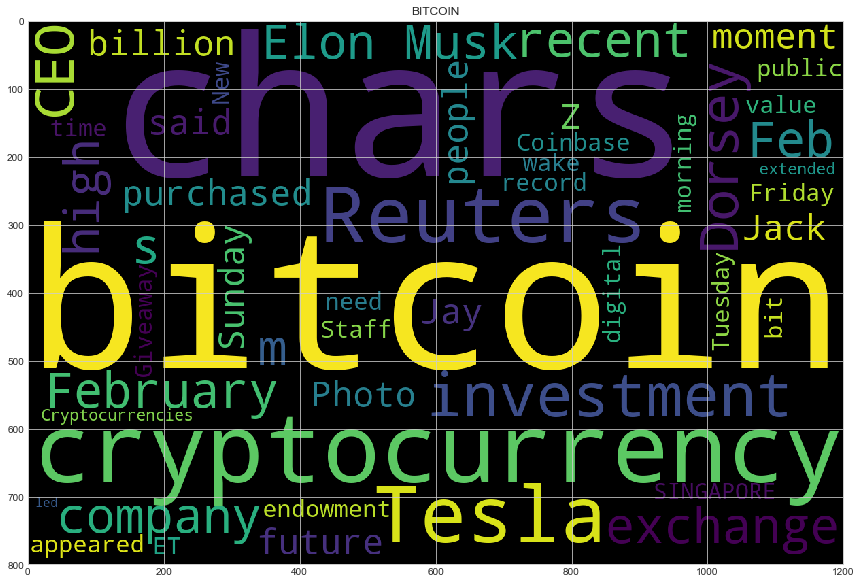

In [128]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def word_cloud(input_text, title=""):
    wc = WordCloud(width=1200, height=800, max_words=50).generate(input_text)
    plt.imshow(wc) 
    plt.title(title)
    plt.show()
word_cloud(bitcoin_df.text.str.cat(), title="BITCOIN")

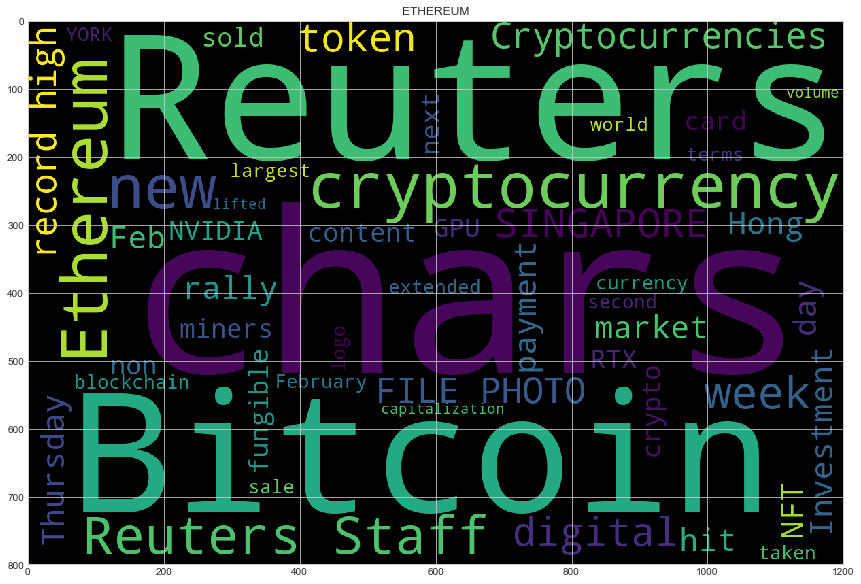

In [129]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
word_cloud(ethereum_df.text.str.cat(), title="ETHEREUM")

3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [130]:
import spacy
from spacy import displacy

In [131]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [132]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [133]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bit_text = bitcoin_df.text.str.cat()
bit_text

"Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars]For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars]Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars]When Bitcoin first appeared out of digital thin air, it was hailed as having the potential to upend the way people spent money. But more than a decade later, cryptocurrency is still only trickling in… [+2039 chars]Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has b

In [134]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(bit_text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Article about Bitcoin"

In [135]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [136]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
first ORDINAL
more than a decade later DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
this morning TIME
over $50,000 MONEY
Francis Suarez PERSON
Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
over $12,000 MONEY
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
chars]Blockchain.com ORG
$120 million MONEY
Moore Strategic Ventu PERSON
chars]This morning TIME
Coinbase WORK_OF_ART
American NORP
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric

Ethereum NER

In [137]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text = ethereum_df.text.str.cat()
eth_text

'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars]NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars]NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars]While the first Christie\'s auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable sales in that world has already taken place. Chris Torres cr… [+1064 chars]Attempting to get ahead of cryptocurrency miners who might snatch up a good chunk of RTX 3060 stock when the GPU goes on sale next week, Nvi

In [138]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(eth_text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Article about Ethereum"

In [139]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [140]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

GeForce ORG
3060 GPE
GPU ORG
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
chars]NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
chars]NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
World FX ORG
Kevin Buckland PERSON
Reuters ORG
Meitu ORG
H